In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [49]:
file_path = r'E:\data\Jan_2019_ontime.csv'

j = pd.read_csv(file_path)
j.head()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [50]:
File_path = r'E:\data\Jan_2020_ontime.csv'

k= pd.read_csv(file_path)
k.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [52]:
j.shape

(583985, 22)

In [51]:
j.sample()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
426713,23,3,DL,19790,DL,N915DE,1548,10397,1039707,ATL,...,SDF,2038.0,0.0,2000-2059,2159.0,0.0,0.0,0.0,321.0,NaN


In [53]:
k.sample()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
424369,23,3,WN,19393,WN,N7713A,128,13931,1393102,ORF,...,MCO,700.0,0.0,0700-0759,850.0,0.0,0.0,0.0,655.0,NaN


In [54]:
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [55]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [56]:
j.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [57]:
k.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [58]:
j[j.duplicated()]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21


In [59]:
k[k.duplicated()]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21


In [63]:
j.loc[j['DEP_TIME_BLK']=='0001-0559', 'DEP_TIME_BLK'] = '0500-0559'
print(j.loc[[211]])

     DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
211             1            2                9E                  20363   

    OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
211         9E   N602LR               5423              11423   

     ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  \
211                1142307    DSM  ...   ATL     540.0       0.0   

     DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  \
211     0500-0559     909.0       0.0        0.0       0.0     743.0   

     Unnamed: 21  
211          NaN  

[1 rows x 22 columns]


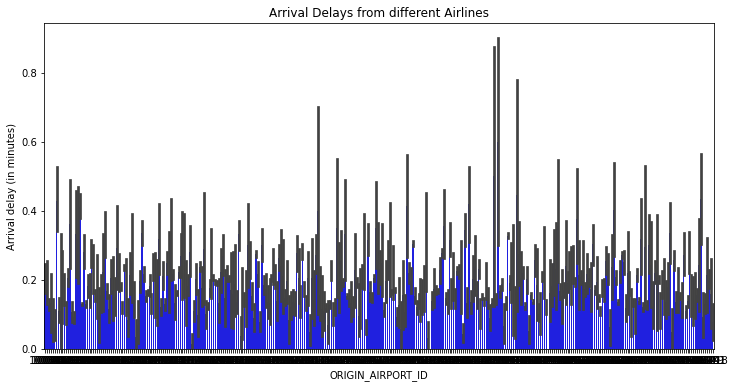

In [64]:
plt.figure(figsize=(12, 6))
plt.title("Arrival Delays from different Airlines")
sns.barplot(x=j.ORIGIN_AIRPORT_ID, y=j['ARR_DEL15'], color='blue')
plt.ylabel("Arrival delay (in minutes)")

# Show the plot
plt.show()

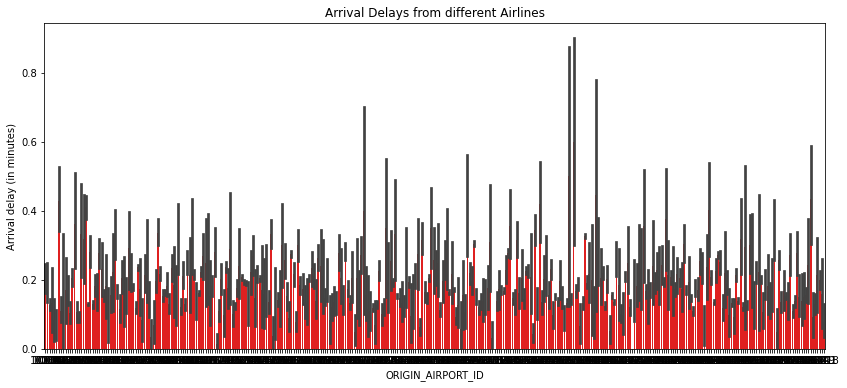

In [66]:
plt.figure(figsize=(14, 6))
plt.title("Arrival Delays from different Airlines")
sns.barplot(x=k.ORIGIN_AIRPORT_ID, y=k['ARR_DEL15'], color='red')
plt.ylabel("Arrival delay (in minutes)")

# Show the plot
plt.show()

Text(0, 0.5, 'Arrival delay (in minutes)')

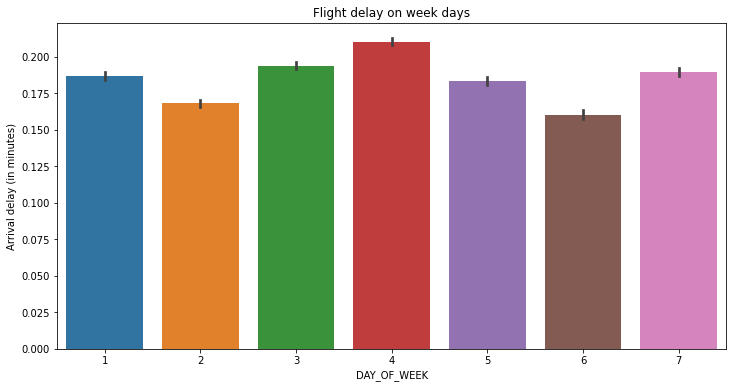

In [67]:
plt.figure(figsize=(12,6))
plt.title("Flight delay on week days")
sns.barplot(x=j.DAY_OF_WEEK, y=j['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")

Text(0, 0.5, 'Arrival delay (in minutes)')

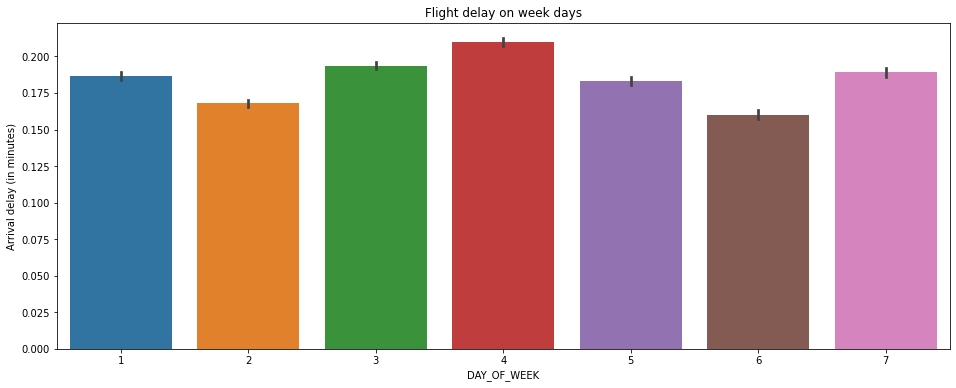

In [69]:
plt.figure(figsize=(16,6))
plt.title("Flight delay on week days")
sns.barplot(x=k.DAY_OF_WEEK, y=k['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")

In [70]:
j.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [71]:
k.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [72]:
j = j[(j.CANCELLED != 1) & (j.DEP_TIME.isna() == False) & (j.ARR_TIME.isna() == False)]
len(j.CANCELLED.isna()), len(j.DEP_TIME.isna()), len(j.ARR_TIME.isna()), len(j)
j = j[(j.ARR_DEL15.isna() == False)]
j.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              565963
dtype: int64

In [73]:
j.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [74]:
k.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [75]:
cols=['Unnamed: 21', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'DIVERTED', 'CANCELLED',
      'ORIGIN', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID',
      'DEST_AIRPORT_SEQ_ID', 'DEST', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER']

j=j.drop(cols,axis=1)

In [76]:
j.isna().sum()

DAY_OF_WEEK          0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DISTANCE             0
dtype: int64

In [80]:
def get_day_category(day_of_week):
    if day_of_week <= 5:
        return 0 
    elif day_of_week > 5:
        return 1 
    
j.DAY_OF_WEEK = j.DAY_OF_WEEK.apply(get_day_category)
j.rename(columns={'DAY_OF_WEEK':'type_of_day'})

,type_of_day,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,0,11953,10397,601.0,0.0,0600-0659,722.0,0.0,300.0
1,0,13487,11193,1359.0,0.0,1400-1459,1633.0,0.0,596.0
2,0,11433,11193,1215.0,0.0,1200-1259,1329.0,0.0,229.0
3,0,15249,10397,1521.0,0.0,1500-1559,1625.0,0.0,223.0
4,0,10397,11778,1847.0,0.0,1900-1959,1940.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...
583980,0,12016,12173,749.0,0.0,0700-0759,1832.0,0.0,3801.0
583981,0,12016,14955,717.0,0.0,0700-0759,759.0,0.0,129.0
583982,0,14955,12016,857.0,0.0,0900-0959,933.0,0.0,129.0
583983,0,14955,12016,1820.0,0.0,1800-1859,1854.0,0.0,129.0


In [81]:
def new_arrival_delay(dep_delay, arr_delay):
    if np.isnan(arr_delay):
        return dep_delay
    else:
        return arr_delay

j['ARR_DEL15'] = j.apply(lambda row :new_arrival_delay(row['DEP_DEL15'],row['ARR_DEL15']), axis = 1)

In [82]:
blocks = []
for hour in range(0,24):
    hour_part = ('%02d' %(hour))
    blocks.append(hour_part + '00-' + hour_part + '59')
blocks
def arrival_time_blk(arr_time):
    arr_hour = str('%04d' %(arr_time))[:2]
    arr_block = None
    for block in blocks:
        if block.startswith(arr_hour):
            arr_block = block
            break
    if arr_block == None and str(arr_time) == '2400.0':
        arr_block = '0000-0059'
    return arr_block

j['ARR_TIME_BLK'] = j.ARR_TIME.apply(arrival_time_blk)
j.drop(['ARR_TIME'], inplace=True, axis=1)

In [89]:
le = LabelEncoder()
le.fit(blocks)
le.classes_
j['ARR_TIME_BLK'] = le.transform(j.ARR_TIME_BLK.values)
j['DEP_TIME_BLK'] = le.transform(j.DEP_TIME_BLK.values)

In [90]:
j= j.reindex(sorted(jan.columns), axis=1)

In [91]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARR_DEL15          565963 non-null  float64
 1   ARR_TIME_BLK       565963 non-null  int32  
 2   DAY_OF_WEEK        565963 non-null  int64  
 3   DEP_TIME_BLK       565963 non-null  int32  
 4   DEST_AIRPORT_ID    565963 non-null  int64  
 5   DISTANCE           565963 non-null  float64
 6   ORIGIN_AIRPORT_ID  565963 non-null  int64  
 7   dest_day_avg       0 non-null       float64
 8   origin_day_avg     565963 non-null  float16
dtypes: float16(1), float64(3), int32(2), int64(3)
memory usage: 51.7 MB


In [94]:
from sklearn.model_selection import train_test_split
Y = j['ARR_DEL15'].values
X = j.drop(['ARR_DEL15'], axis=1).values

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size=0.2, random_state=1)

In [95]:
X_test.shape

(113193, 8)

In [96]:
X_train.shape

(452770, 8)

In [112]:
X_train = X_train.astype(np.int32)
Y_train = Y_train.astype(np.int32)
X_test = X_train.astype(np.int32)
Y_test = Y_train.astype(np.int32)


In [113]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [114]:
predicted = model.predict(X_test)
model.score(X_test, Y_test)

0.9315767387415244

In [115]:
from sklearn.metrics  import classification_report,confusion_matrix,f1_score
model_predictions = model.predict(X_test)
print("confusion matrix is:\n",confusion_matrix(Y_test, model_predictions))

print("\nClassification report is:\n",classification_report(Y_test, model_predictions))

confusion matrix is:
 [[364503   4076]
 [ 26904  57287]]

Classification report is:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    368579
           1       0.93      0.68      0.79     84191

    accuracy                           0.93    452770
   macro avg       0.93      0.83      0.87    452770
weighted avg       0.93      0.93      0.93    452770

